In [0]:
from keras.models import Model
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.layers import Dense, Flatten, Reshape, Input, AveragePooling2D, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization,RepeatVector, LSTM
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
def base_model_Autoencoder(level = 2, input_size=(28,28,1), kernel_list=[32,64]):

  img_input = Input(input_size)

  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(img_input)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D()(x)

  for i in range(level-1):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
  x1 = x
  print(x1.shape)

  for i in range(level-1) :
    k = -(level-1)+i  

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
     
    x = Conv2D(kernel_list[k], (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

  x = Conv2DTranspose(kernel_list[0], (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  model = Model(img_input, x)
   
  modelviz0=Model(img_input, x1)
  model.compile(optimizer=Adam(),
                  loss='mean_squared_error',
                  metrics=['accuracy'])

  return model, modelviz0

In [0]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

noice = 0.9 #возьмем коэффициэнт зашумленности 0.9

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

yTrainMnist_pix = xTrainMnist.copy()
xTrainMnist += np.random.randn(xTrainMnist.shape[0],xTrainMnist.shape[1],xTrainMnist.shape[2],xTrainMnist.shape[3]) * noice

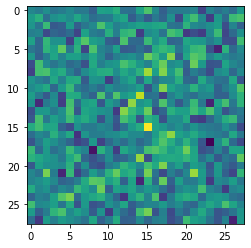

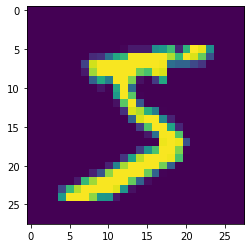

In [205]:
plt.imshow(xTrainMnist[0,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[0,:,:,0])
plt.show()

In [206]:
modelAutoMnist, m0 = base_model_Autoencoder(level = 2, input_size=(28,28,1), kernel_list=[32,64])

(?, 7, 7, 64)


In [207]:

#modelAutoMnist = denoiseAutoencoder()
hist=modelAutoMnist.fit(xTrainMnist[:10000], yTrainMnist_pix[:10000], epochs=10, batch_size=100, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.0669 - acc: 0.7756 - val_loss: 0.0376 - val_acc: 0.8068
Epoch 2/10
8000/8000 [==============================] - 5s 618us/step - loss: 0.0319 - acc: 0.8052 - val_loss: 0.0312 - val_acc: 0.8073
Epoch 3/10
8000/8000 [==============================] - 5s 615us/step - loss: 0.0276 - acc: 0.8064 - val_loss: 0.0285 - val_acc: 0.8076
Epoch 4/10
8000/8000 [==============================] - 5s 619us/step - loss: 0.0258 - acc: 0.8069 - val_loss: 0.0284 - val_acc: 0.8087
Epoch 5/10
8000/8000 [==============================] - 5s 618us/step - loss: 0.0247 - acc: 0.8073 - val_loss: 0.0267 - val_acc: 0.8080
Epoch 6/10
8000/8000 [==============================] - 5s 611us/step - loss: 0.0239 - acc: 0.8076 - val_loss: 0.0274 - val_acc: 0.8089
Epoch 7/10
8000/8000 [==============================] - 5s 615us/step - loss: 0.0233 - acc: 0.8079 - val_loss: 0.0260 - val_acc: 0.8082
E

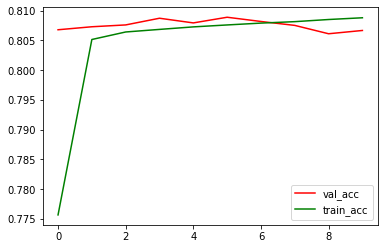

In [208]:
plt.plot(hist.history['val_acc'],'r',label='val_acc')
plt.plot(hist.history['acc'],'g',label='train_acc')
plt.legend()
plt.show()

In [209]:
y_pred=modelAutoMnist.predict(xTrainMnist)
print(y_pred.shape)


(60000, 28, 28, 1)


In [210]:


int_yTrainMnist = (yTrainMnist_pix.flatten()*255).round() 
int_y_pred = (y_pred.flatten()*255).round()
y_filtered = int_y_pred[int_yTrainMnist == int_y_pred]
dice = len(y_filtered) * 2.0/(len(int_yTrainMnist) + len(int_y_pred)) 
print(dice)

0.006943622448979592


In [211]:
modelAutoMnist.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_101 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_102 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 14, 14, 64)        184

In [213]:
mask = np.where(yTrainMnist == 0)

y_pred=modelAutoMnist.predict(xTrainMnist[mask[0]])

ff=m0.predict(xTrainMnist[mask[0]])
print(ff.shape)

ff = np.mean(ff, axis=0)
print(ff.shape)

(5923, 7, 7, 64)
(7, 7, 64)


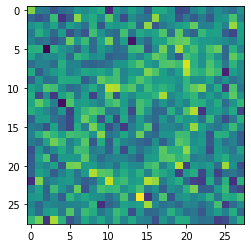

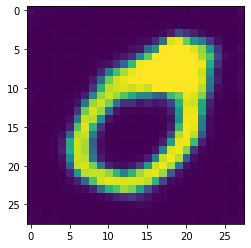

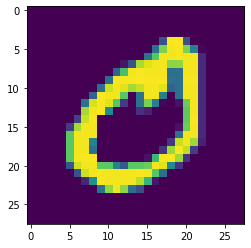

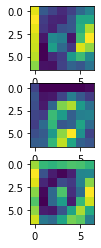

In [215]:
plt.imshow(xTrainMnist[mask[0]][1,:,:,0])
plt.show()
plt.imshow(y_pred[1,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[mask[0]][1,:,:,0])
plt.show()

g1=ff[:,:,0]
plt.subplot(311)
plt.imshow(g1)
g1=ff[:,:,1]
plt.subplot(312)
plt.imshow(g1)
g1=ff[:,:,2]
plt.subplot(313)
plt.imshow(g1)
plt.show()

In [0]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

noice = 0.4 #возьмем коэффициэнт зашумленности 0.4

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

yTrainMnist_pix = xTrainMnist.copy()
xTrainMnist += np.random.randn(xTrainMnist.shape[0],xTrainMnist.shape[1],xTrainMnist.shape[2],xTrainMnist.shape[3]) * noice

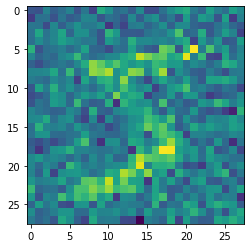

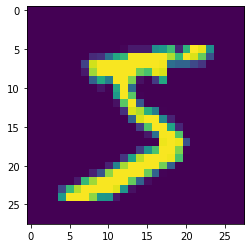

In [217]:
plt.imshow(xTrainMnist[0,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[0,:,:,0])
plt.show()

In [218]:

#modelAutoMnist = denoiseAutoencoder()
hist=modelAutoMnist.fit(xTrainMnist[:10000], yTrainMnist_pix[:10000], epochs=10, batch_size=100, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 5s 627us/step - loss: 0.0092 - acc: 0.8136 - val_loss: 0.0089 - val_acc: 0.8134
Epoch 2/10
8000/8000 [==============================] - 5s 612us/step - loss: 0.0079 - acc: 0.8140 - val_loss: 0.0082 - val_acc: 0.8135
Epoch 3/10
8000/8000 [==============================] - 5s 612us/step - loss: 0.0075 - acc: 0.8141 - val_loss: 0.0081 - val_acc: 0.8136
Epoch 4/10
8000/8000 [==============================] - 5s 609us/step - loss: 0.0073 - acc: 0.8142 - val_loss: 0.0080 - val_acc: 0.8136
Epoch 5/10
8000/8000 [==============================] - 5s 610us/step - loss: 0.0074 - acc: 0.8141 - val_loss: 0.0083 - val_acc: 0.8137
Epoch 6/10
8000/8000 [==============================] - 5s 610us/step - loss: 0.0071 - acc: 0.8142 - val_loss: 0.0088 - val_acc: 0.8136
Epoch 7/10
8000/8000 [==============================] - 5s 615us/step - loss: 0.0069 - acc: 0.8143 - val_loss: 0.0075 - val_acc: 0.8135


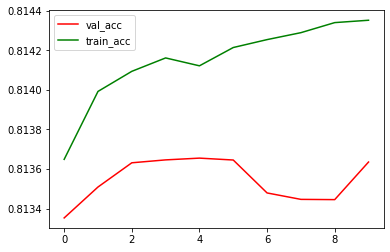

In [219]:
plt.plot(hist.history['val_acc'],'r',label='val_acc')
plt.plot(hist.history['acc'],'g',label='train_acc')
plt.legend()
plt.show()

In [220]:
y_pred=modelAutoMnist.predict(xTrainMnist)

int_yTrainMnist = (yTrainMnist_pix.flatten()*255).round() 
int_y_pred = (y_pred.flatten()*255).round()
y_filtered = int_y_pred[int_yTrainMnist == int_y_pred]
dice = len(y_filtered) * 2.0/(len(int_yTrainMnist) + len(int_y_pred)) 
print(dice)

0.05812062074829932


In [0]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

noice = 0.1 #возьмем коэффициэнт зашумленности 0.1

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

yTrainMnist_pix = xTrainMnist.copy()
xTrainMnist += np.random.randn(xTrainMnist.shape[0],xTrainMnist.shape[1],xTrainMnist.shape[2],xTrainMnist.shape[3]) * noice

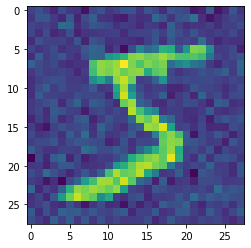

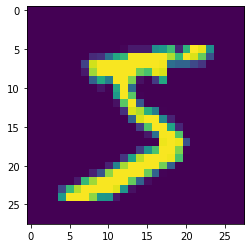

In [222]:
plt.imshow(xTrainMnist[0,:,:,0])
plt.show()
plt.imshow(yTrainMnist_pix[0,:,:,0])
plt.show()

In [223]:

#modelAutoMnist = denoiseAutoencoder()
hist=modelAutoMnist.fit(xTrainMnist[:10000], yTrainMnist_pix[:10000], epochs=10, batch_size=100, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 5s 632us/step - loss: 0.0029 - acc: 0.8148 - val_loss: 0.0037 - val_acc: 0.8142
Epoch 2/10
8000/8000 [==============================] - 5s 618us/step - loss: 0.0026 - acc: 0.8149 - val_loss: 0.0039 - val_acc: 0.8142
Epoch 3/10
8000/8000 [==============================] - 5s 618us/step - loss: 0.0023 - acc: 0.8149 - val_loss: 0.0035 - val_acc: 0.8142
Epoch 4/10
8000/8000 [==============================] - 5s 618us/step - loss: 0.0022 - acc: 0.8149 - val_loss: 0.0029 - val_acc: 0.8143
Epoch 5/10
8000/8000 [==============================] - 5s 617us/step - loss: 0.0021 - acc: 0.8149 - val_loss: 0.0022 - val_acc: 0.8143
Epoch 6/10
8000/8000 [==============================] - 5s 618us/step - loss: 0.0020 - acc: 0.8149 - val_loss: 0.0021 - val_acc: 0.8143
Epoch 7/10
8000/8000 [==============================] - 5s 619us/step - loss: 0.0020 - acc: 0.8149 - val_loss: 0.0019 - val_acc: 0.8143


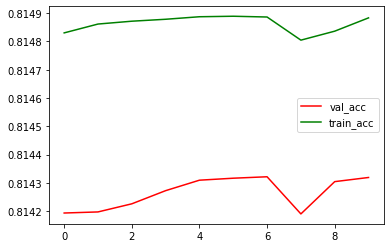

In [224]:
plt.plot(hist.history['val_acc'],'r',label='val_acc')
plt.plot(hist.history['acc'],'g',label='train_acc')
plt.legend()
plt.show()

In [225]:
y_pred=modelAutoMnist.predict(xTrainMnist)
print(y_pred.shape)


(60000, 28, 28, 1)


In [226]:
int_yTrainMnist = (yTrainMnist_pix.flatten()*255).round() 
int_y_pred = (y_pred.flatten()*255).round()
y_filtered = int_y_pred[int_yTrainMnist == int_y_pred]
dice = len(y_filtered) * 2.0/(len(int_yTrainMnist) + len(int_y_pred)) 
print(dice)

0.29565486819727893


Вывод: при увеличении зашумленности точность падает. При noise = 0.1: DSC = 0.3. При noise = 0.4: DSC = 0.06. При noise = 0.9: DSC = 0.07.

Коэффициэнт Деци больше подходит для задач классификации. В автокодировщиках скорее задача регрессии, тоесть надо учитывать не точное совпадение пикселов, а степень близости. Мне кажется больше бы подошел такой критерий как среднеквадратичная ошибка MSE или MAE.

Мы видим, что случае зашумленности noise = 0.9 получается только 1% точных совпадений, но картинка все равно визуально похожа.